In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import f1_score,accuracy_score,classification_report
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import GridSearchCV ,RandomizedSearchCV,HalvingGridSearchCV
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/sazzad15-1779/Datasets/master/Cardiovascular_Disease_dataset/cardio_train.csv',sep=";")
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [6]:
data.dtypes
# all the coulmns are in numerical datatype|

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

### Visualizing data relations 

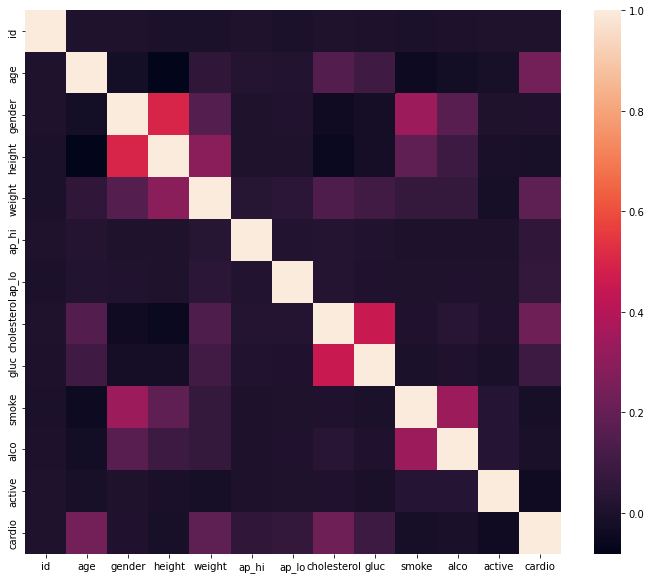

In [7]:
#using heatmap
plt.figure(figsize=(12,10))
sns.heatmap(data.corr())
plt.show()

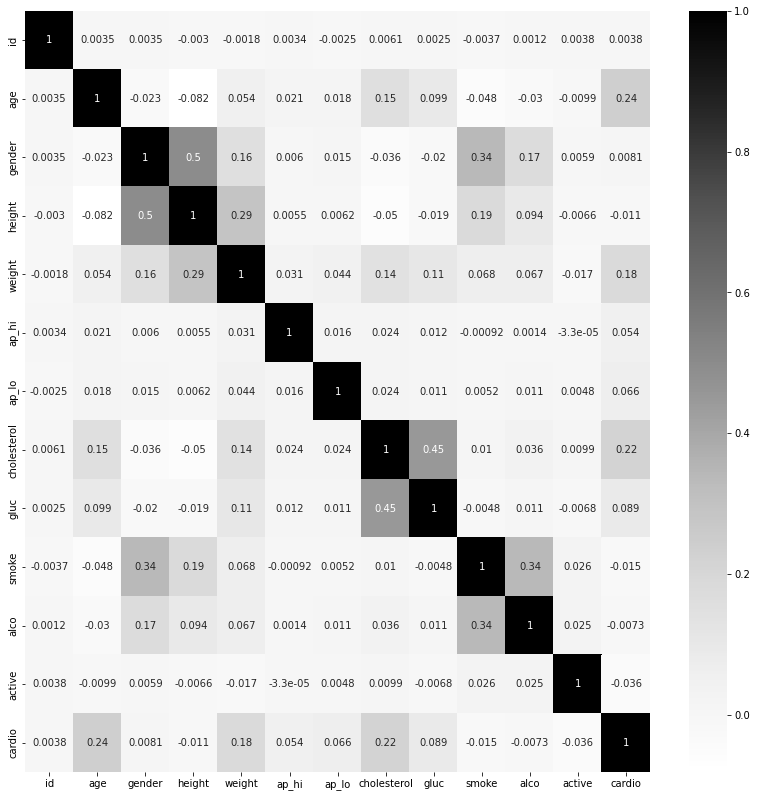

In [8]:
plt.figure(figsize=(14,14))
sns.heatmap(data.corr(), cmap='Greys', annot=True)
plt.show()

# visualizing for outliers detection

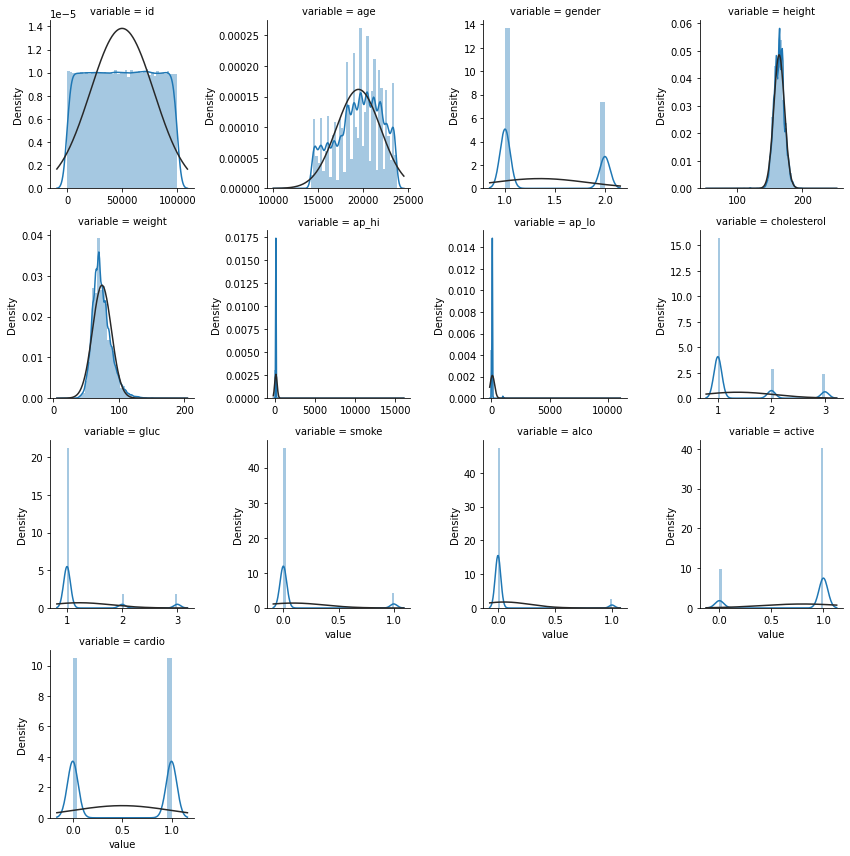

In [9]:
# histogram for numerical data
f = pd.melt(data, value_vars = data.columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g.map(lambda _x, **kwargs: sns.distplot(_x,fit=norm), 'value');


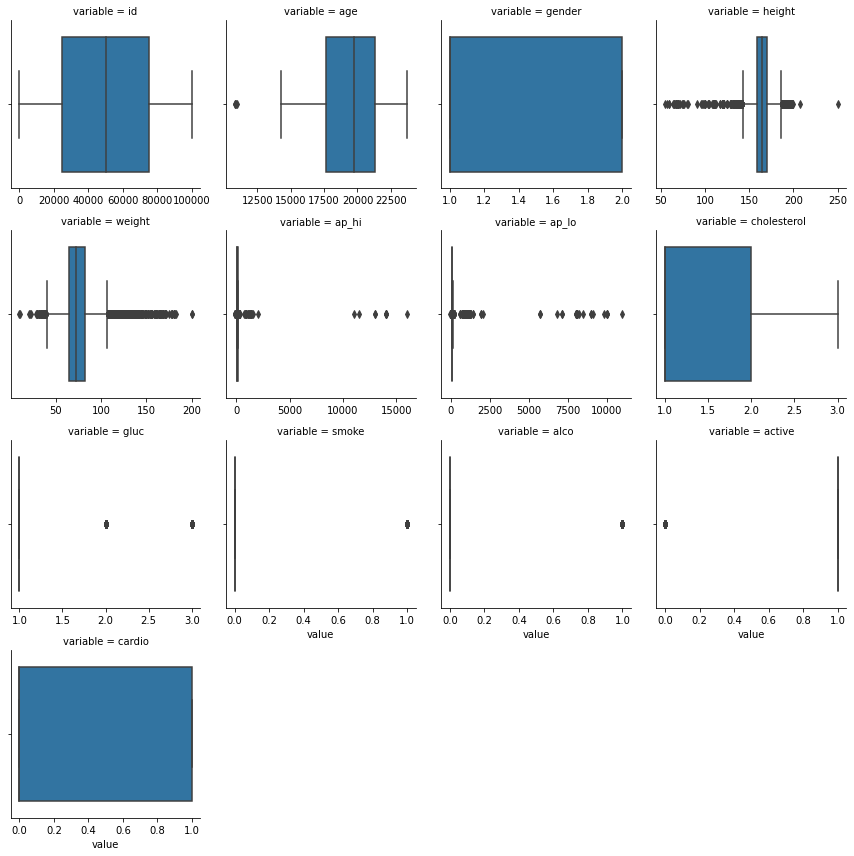

In [10]:
# histogram for numerical data
f = pd.melt(data, value_vars = data.columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g.map(lambda _x, **kwargs: sns.boxplot(_x), 'value');

In [11]:
data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
#outlier
# weight,ap_hi,ap_lo,height
col=['weight','ap_hi','ap_lo','height']

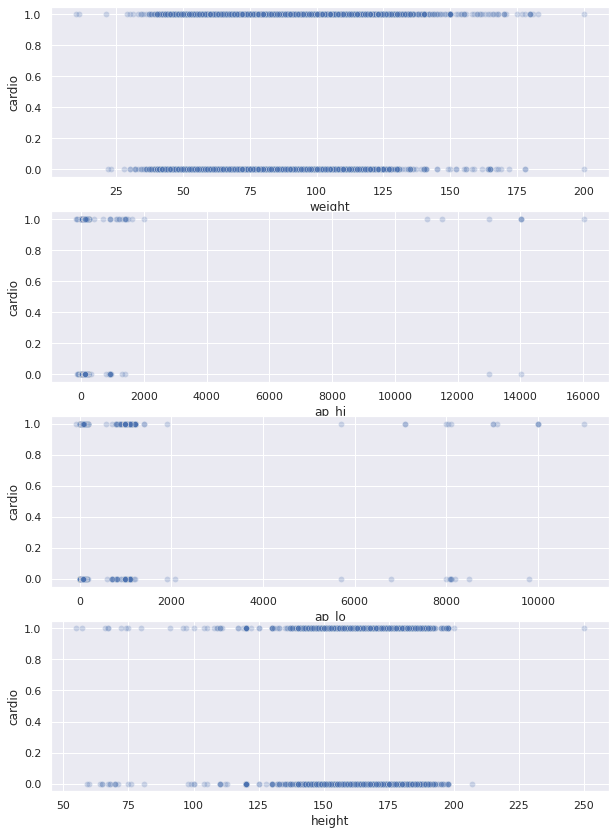

In [13]:
sns.set()
plt.figure(figsize=(10,150))
for i ,  var in enumerate(col):
  plt.subplot(40,1,i+1)
  sns.scatterplot(x=data[var] , y=data['cardio'], alpha=0.25)

# pre-processing

In [14]:
age = round((data['age']/365.25),2)
age

0        50.36
1        55.38
2        51.63
3        48.25
4        47.84
         ...  
69995    52.68
69996    61.88
69997    52.20
69998    61.41
69999    56.24
Name: age, Length: 70000, dtype: float64

In [15]:
data.age =age
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.36,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.38,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51.63,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.25,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47.84,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,52.68,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,61.88,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52.20,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61.41,1,163,72.0,135,80,1,2,0,0,0,1


In [16]:
data.insert(3, "female", (data['gender']==1).astype(int))
data.insert(4, 'male', (data['gender']==2).astype(int))
data.drop(['gender', 'id'], axis=1, inplace=True)
data

,age,female,male,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.36,0,1,168,62.0,110,80,1,1,0,0,1,0
1,55.38,1,0,156,85.0,140,90,3,1,0,0,1,1
2,51.63,1,0,165,64.0,130,70,3,1,0,0,0,1
3,48.25,0,1,169,82.0,150,100,1,1,0,0,1,1
4,47.84,1,0,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.68,0,1,168,76.0,120,80,1,1,1,0,1,0
69996,61.88,1,0,158,126.0,140,90,2,2,0,0,1,1
69997,52.20,0,1,183,105.0,180,90,3,1,0,1,0,1
69998,61.41,1,0,163,72.0,135,80,1,2,0,0,0,1


In [17]:
data.duplicated().sum(),data.shape

(75, (70000, 13))

In [18]:
data.drop_duplicates(inplace=True)
data.shape

(69925, 13)

In [19]:
# data.insert(5, 'bmi', round((data['weight']/(data['height']/100)**2), 2))
# data

In [20]:
data.drop('female',axis=1,inplace=True)
data

,age,male,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.36,1,168,62.0,110,80,1,1,0,0,1,0
1,55.38,0,156,85.0,140,90,3,1,0,0,1,1
2,51.63,0,165,64.0,130,70,3,1,0,0,0,1
3,48.25,1,169,82.0,150,100,1,1,0,0,1,1
4,47.84,0,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,52.68,1,168,76.0,120,80,1,1,1,0,1,0
69996,61.88,0,158,126.0,140,90,2,2,0,0,1,1
69997,52.20,1,183,105.0,180,90,3,1,0,1,0,1
69998,61.41,0,163,72.0,135,80,1,2,0,0,0,1


#spliting data

In [21]:
x = data.drop(['cardio'], axis=1)
y = data['cardio']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=.25,random_state=43)

In [23]:
X_train.shape

(52443, 11)

# numerical value standerdization

In [24]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler,StandardScaler

In [25]:
scaler = StandardScaler().fit(X_train)
X_train_std_scl = scaler.transform(X_train)
X_test_std_scl = scaler.transform(X_test)

In [26]:
X_train_std_scl.shape,X_test_std_scl.shape,y_train.shape,y_test.shape

((52443, 11), (17482, 11), (52443,), (17482,))

#creating model

In [ ]:

classifiers = {
    'Logistic Regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Support Vector Machines' : SVC(),
    'K-nearest Neighbors' : KNeighborsClassifier(),
    'XGBoost' : XGBClassifier(),
    'LGBBoost':LGBMClassifier()
}

In [ ]:
results=pd.DataFrame(columns=['Accuracy in %','F1-score'])
for method,func in classifiers.items():
    func.fit(X_train_std_scl,y_train)
    pred = func.predict(X_test_std_scl)
    results.loc[method]= [100*np.round(accuracy_score(y_test,pred),decimals=4),
                         round(f1_score(y_test,pred),2)]
results

,Accuracy in %,F1-score
Logistic Regression,72.15,0.71
Decision Tree,63.29,0.63
Random Forest,71.83,0.71
Support Vector Machines,72.90,0.72
K-nearest Neighbors,64.83,0.64
XGBoost,74.02,0.73
LGBBoost,73.81,0.73


In [ ]:
results.sort_values(by='Accuracy in %',ascending=False).style.highlight_max()

,Accuracy in %,F1-score
XGBoost,74.020000,0.730000
LGBBoost,73.810000,0.730000
Support Vector Machines,72.900000,0.720000
Logistic Regression,72.150000,0.710000
Random Forest,71.830000,0.710000
K-nearest Neighbors,64.830000,0.640000
Decision Tree,63.290000,0.630000


# hyper parameter tunning

### random forest tuning

In [ ]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 1000,5)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)


{'n_estimators': [200, 650, 1100, 1550, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 257, 505, 752, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [ ]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=10,cv=3,verbose=2,random_state=100)
### fit the randomized model
rf_randomcv.fit(X_train_std_scl,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=  50.2s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=  50.3s
[CV] END criterion=gini, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=2000; total time=  50.2s
[CV] END criterion=gini, max_depth=1000, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   7.5s
[CV] END criterion=gini, max_depth=1000, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   7.6s
[CV] END criterion=gini, max_depth=1000, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   7.6s
[CV] END criterion=gini, max_depth=257, max_features=auto, min_samples_leaf=4, min_samples_split=14, n_estimators=

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 257, 505, 752, 1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [200, 650, 1100, 1550,
                                                         2000]},
                   random_state=100, verbose=2)

In [ ]:
print(rf_randomcv.best_params_)
print(rf_randomcv.best_estimator_)
print(rf_randomcv.best_score_)

{'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'gini'}
RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=2000)
0.7345498922639818


###lgboosting tuninig

In [ ]:
lgb = LGBMClassifier()
#Define the parameters
parameters = {'num_leaves':[20,40,60,80,100], 'min_child_samples':[5,10,15],'max_depth':[5,8,12,10],
             'learning_rate':[0.05,0.1, 0.01, 0.02],'reg_alpha':[0,0.01,0.03], 'num_iterations': [100,200,300,500]}
reg = HalvingGridSearchCV(lgb,parameters,cv=3,n_jobs=1,factor=3)
reg.fit(X_train_std_scl, y_train)

HalvingGridSearchCV(cv=3, estimator=LGBMClassifier(), n_jobs=1,
                    param_grid={'learning_rate': [0.05, 0.1, 0.01, 0.02],
                                'max_depth': [5, 8, 12, 10],
                                'min_child_samples': [5, 10, 15],
                                'num_iterations': [100, 200, 300, 500],
                                'num_leaves': [20, 40, 60, 80, 100],
                                'reg_alpha': [0, 0.01, 0.03]})

In [ ]:
print(reg.best_params_)
print(reg.best_score_)

{'learning_rate': 0.02, 'max_depth': 12, 'min_child_samples': 5, 'num_iterations': 100, 'num_leaves': 20, 'reg_alpha': 0}
0.7344386791515078


### xgboosting hypertuning
##### Accuracy get 80%

In [27]:
param_grid = {
    "max_depth": [3, 4, 5, ],
    "learning_rate":[0.1,.02,.01,.07],
    " n_estimators":[100,200,300,400,1000],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5]
}
xgb_cl=XGBClassifier()
xgb_halv = HalvingGridSearchCV(
    xgb_cl, param_grid, scoring="roc_auc", n_jobs=1, min_resources="exhaust", factor=3
)
xgb_halv_h= xgb_halv.fit(X_train_std_scl, y_train)


In [30]:
print(xgb_halv_h.best_params_)
print(xgb_halv_h.best_score_)



{' n_estimators': 100, 'gamma': 1, 'learning_rate': 0.07, 'max_depth': 3, 'reg_lambda': 10, 'scale_pos_weight': 1}
0.8011876601113546


In [29]:
xgb_halv_h.score(X_test_std_scl,y_test)

0.8033556671989253

#Ann apply

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
X_train, X_val, y_train, y_val = train_test_split(X_train_std_scl,y_train,test_size=0.20)

In [ ]:


model = Sequential()
model.add(Dense(12,activation='relu'))
model.add(Dense(50,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu',kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
    bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1)))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',metrics = ["accuracy"])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

model.fit(x=X_train,y=y_train,
          validation_data=(X_val,y_val.values),
          batch_size=100,epochs=150,callbacks=[early_stop])


Epoch 1/150
420/420 [==============================] - 3s 6ms/step - loss: 0.6355 - accuracy: 0.6414 - val_loss: 0.6134 - val_accuracy: 0.6742
Epoch 2/150
420/420 [==============================] - 2s 5ms/step - loss: 0.5916 - accuracy: 0.6976 - val_loss: 0.5765 - val_accuracy: 0.7147
Epoch 3/150
420/420 [==============================] - 2s 5ms/step - loss: 0.5711 - accuracy: 0.7164 - val_loss: 0.5621 - val_accuracy: 0.7223
Epoch 4/150
420/420 [==============================] - 2s 5ms/step - loss: 0.5633 - accuracy: 0.7208 - val_loss: 0.5575 - val_accuracy: 0.7250
Epoch 5/150
420/420 [==============================] - 2s 5ms/step - loss: 0.5602 - accuracy: 0.7247 - val_loss: 0.5582 - val_accuracy: 0.7274
Epoch 6/150
420/420 [==============================] - 2s 5ms/step - loss: 0.5569 - accuracy: 0.7258 - val_loss: 0.5542 - val_accuracy: 0.7237
Epoch 7/150
420/420 [==============================] - 2s 5ms/step - loss: 0.5556 - accuracy: 0.7262 - val_loss: 0.5528 - val_accuracy: 0.7246

In [ ]:
#Accuracy of test dataset
model.evaluate(X_test_std_scl,y_test)

547/547 [==============================] - 2s 4ms/step - loss: 0.5424 - accuracy: 0.7318


[0.5423644185066223, 0.7318384647369385]

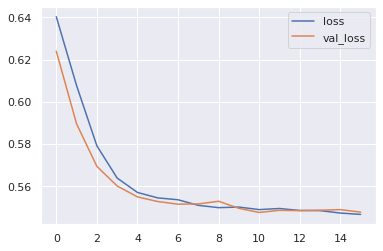

In [ ]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot();

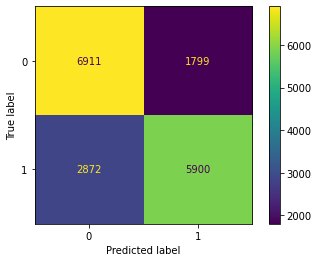

In [ ]:
plot_confusion_matrix(random_model, X_test, y_test, values_format='d')